# 2008 USA Flights Data Exploration

### Variables Description

Dataset and variables description are obtained from [stat-computing.org](<http://stat-computing.org/dataexpo/2009/the-data.html>) and [Bureau of Transportaion Statistics](<https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations>)<br>

1  **Year**  1987-2008  - *This data is for 2008 only*<br>
2  **Month**	1-12<br>
3  **DayofMonth**	1-31<br>
4  **DayOfWeek**	1 (Monday) - 7 (Sunday)<br>
5 	**DepTime**	actual departure time (local, hhmm)<br>
6 	**CRSDepTime**	scheduled departure time (local, hhmm)<br>
7 	**ArrTime**	actual arrival time (local, hhmm)<br>
8 	**CRSArrTime**	scheduled arrival time (local, hhmm)<br>
9 	**UniqueCarrier**	unique carrier code<br>
10 	**FlightNum**	flight number<br>
11	**TailNum**	plane tail number<br>
12	**ActualElapsedTime**	in minutes<br>
13	**CRSElapsedTime**	in minutes<br>
14	**AirTime**	in minutes<br>
15	**ArrDelay**	arrival delay, in minutes<br>
16	**DepDelay**	departure delay, in minutes<br>
17	**Origin**	origin IATA airport code<br>
18	**Dest**	destination IATA airport code<br>
19	**Distance**	in miles<br>
20	**TaxiIn**	taxi in time, in minutes<br>
21	**TaxiOut**	taxi out time in minutes<br>
22	**Cancelled**	was the flight cancelled?<br>
23	**CancellationCode**	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)<br>
24	**Diverted**	1 = yes, 0 = no<br>
25	**CarrierDelay**	in minutes. The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.). [source](<https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations>)<br>
26	**WeatherDelay**	in minutes. Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane. [source](<https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations>)<br>
27	**NASDelay**	in minutes. Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control. [source](<https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations>)<br>
28	**SecurityDelay**	in minutes. Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas. [source](<https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations>)<br>
29	**LateAircraftDelay**	in minutes. A previous flight with same aircraft arrived late, causing the present flight to depart late. [source](<https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations>)<br>

### Purpose of Analysis

In this project, I am interested to see if the flights arrival delay is affected by any factors. My initial intuition is that departure delay has a direct effect on the arrival delay.  However, I would like to see how other types of delay such as carrier, weather, National Aviation System, security, and late aircraft may affect both arrival and departure delay. <br>

Another important variable that I believe could have an effect on the flight delay is the month of the year.  For example, December could have more flight delay since snowing is more likely to happen.  <br>

Now, some airline carriers may cause more delay than other carriers may do, so I am going to include this variable in the analysis, as well as checking which carrier seems to be better in reducing flight delay.  <br>

Other factors such as diverted fights, distance between two airports may not have a distinct effect on the flight delay, but I am going to include those in the analysis. 

### Variables of Interest
- Month
- UniqueCarrier
- ArrDelay
- DepDelay
- Dest
- Distance
- Diverted
- CarrierDelay
- WeatherDelay
- NASDelay
- SecurityDelay
- LateAircraftDelay

## Data Wrangling
### Gather

In [28]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [29]:
df = pd.read_csv('2008.csv')

### Assess
#### Preliminary Visual Assessment

In [30]:
print(df.shape)
print(df.info(null_counts = True))
df.head()

(7009728, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn             

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


#### Programmatic Variables Assessment
**Month**

In [31]:
# print the unique values of months and thier counts
print(df.Month.unique())
print(df.Month.value_counts(dropna = False))

[ 1  2  3  4  5  6  7  8  9 10 11 12]
7     627931
3     616090
8     612279
6     608665
5     606293
1     605765
4     598126
2     569236
10    556205
12    544958
9     540908
11    523272
Name: Month, dtype: int64


*No issues*

**UniqueCarrier**

In [32]:
# print the value counts of the UniqueCarrier
df.UniqueCarrier.value_counts(dropna = False)

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: UniqueCarrier, dtype: int64

*No issues*

**ArrDelay**

In [33]:
# print the first five rows of ArrDelay, descriptve stats, and number of missing values
print(df.ArrDelay.head())
print()
print(df.ArrDelay.describe().astype(int))
print()
print('missing values:', df.ArrDelay.isnull().sum())

0   -14.0
1     2.0
2    14.0
3    -6.0
4    34.0
Name: ArrDelay, dtype: float64

count    6855029
mean           8
std           38
min         -519
25%          -10
50%           -2
75%           12
max         2461
Name: ArrDelay, dtype: int32

missing values: 154699


*Issue 1: missing values*<br>
*Issue 2: outliers*

**DepDelay**

In [34]:
# print the first five rows of DepDelay, descriptive stats, and number of missing values
print(df.DepDelay.head())
print()
print(df.DepDelay.describe().astype(int))
print()
print('missing values:', df.DepDelay.isnull().sum())

0     8.0
1    19.0
2     8.0
3    -4.0
4    34.0
Name: DepDelay, dtype: float64

count    6873482
mean           9
std           35
min         -534
25%           -4
50%           -1
75%            8
max         2467
Name: DepDelay, dtype: int32

missing values: 136246


*Issue 1: missing values*<br>
*Issue 2: outliers*

**Dest**

In [35]:
# print the names of unique destination airpots, number of missing values, and thier value counts
print(df.Dest.unique())
print()
print('missing values:', df.Dest.isnull().sum())
print()
print(df.Dest.value_counts(dropna = False))

['TPA' 'BWI' 'JAX' 'LAS' 'MCI' 'MCO' 'MDW' 'PHX' 'FLL' 'PBI' 'RSW' 'HOU'
 'BHM' 'BNA' 'IND' 'ORF' 'PHL' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BOI' 'BUF'
 'BUR' 'CLE' 'CMH' 'DEN' 'ELP' 'GEG' 'IAD' 'ISP' 'LAX' 'LBB' 'LIT' 'MAF'
 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'PDX' 'PIT' 'PVD' 'RDU' 'RNO' 'SAN'
 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC' 'SMF' 'SNA' 'STL' 'TUL' 'TUS' 'DAL'
 'DTW' 'JAN' 'HRL' 'CRP' 'EWR' 'IAH' 'XNA' 'DCA' 'GSO' 'ROC' 'MYR' 'SYR'
 'ATL' 'SAV' 'RIC' 'COS' 'FAT' 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MSN' 'CAE'
 'DAY' 'BTR' 'TLH' 'DFW' 'LFT' 'PWM' 'SHV' 'MKE' 'CHS' 'CRW' 'HSV' 'TYS'
 'MTJ' 'MGM' 'MFE' 'MSP' 'GSP' 'GRR' 'MEM' 'BTV' 'CLT' 'BRO' 'CVG' 'LGA'
 'VPS' 'LEX' 'BPT' 'PNS' 'ORD' 'ABE' 'LRD' 'BGR' 'GRK' 'SRQ' 'LCH' 'AEX'
 'AVL' 'GPT' 'MLU' 'MOB' 'BOS' 'DSM' 'CHA' 'CLL' 'PSP' 'DAB' 'ILM' 'JFK'
 'MDT' 'ASE' 'COD' 'CPR' 'DRO' 'EGE' 'GJT' 'HDN' 'RAP' 'ITO' 'KOA' 'LIH'
 'OGG' 'ROA' 'SPI' 'HNL' 'MFR' 'SBA' 'SBP' 'YUM' 'ATW' 'AVP' 'BMI' 'CAK'
 'CID' 'CWA' 'FSD' 'FWA' 'GRB' 'LAN' 'MBS' 'SBN' 'C

*No issues*

**Distance**

In [36]:
# print the first five rows of the distance, descriptive stats, and number of missing values
print(df.Distance.head())
print()
print(df.Distance.describe().astype(int))
print()
print('missing values:', df.Distance.isnull().sum())

0    810
1    810
2    515
3    515
4    515
Name: Distance, dtype: int64

count    7009728
mean         726
std          562
min           11
25%          325
50%          581
75%          954
max         4962
Name: Distance, dtype: int32

missing values: 0


In [37]:
# check how could the distance to be only 11 mile
df.query('Distance < 30') [['Origin', 'Dest', 'Distance', 'AirTime']].sort_values('Distance')

,Origin,Dest,Distance,AirTime
2547298,JFK,LGA,11,31.0
4392215,JFK,LGA,11,14.0
1688702,EWR,LGA,17,NaN
1087573,FLL,MIA,21,NaN
2877459,MIA,FLL,21,11.0
151660,IAD,DCA,24,11.0
1637250,IAH,HOU,24,10.0
6353439,IAH,HOU,24,9.0
798309,SLC,OGD,28,NaN


*No issues: it seems the flight was within NY although this seems to be strange, I will keep the data*

**Diverted**

In [38]:
# print the value counts of Diverted
df.Diverted.value_counts(dropna = True)

0    6992463
1      17265
Name: Diverted, dtype: int64

*Issue: change 0 to 'No' and 1 to 'Yes'*

**CarrierDelay, WeatherDelay, SecurityDelay, NASDelay, and LateAircraftDelay**

As we saw from `df.info()`, it seems that `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay` have the same number of missing values, so I will create a function that returns desired assessments info and apply to each variable

In [39]:
def assess_col(col_name):
    ''' Returns no. of missing values, desc. stats, count of zero values, and % of zero values for specified variable'''
    print('missing values = ', df[col_name].isnull().sum())
    print()
    print(df[col_name].describe().astype(int))
    print()
    print('Zero value counts = ', df[df[col_name] == 0][col_name].count())
    print('Zero value % = ', df[df[col_name] == 0][col_name].count() / df[col_name].notnull().sum())    

**CarrierDelay**

In [40]:
assess_col('CarrierDelay')

missing values =  5484993

count    1524735
mean          15
std           40
min            0
25%            0
50%            0
75%           16
max         2436
Name: CarrierDelay, dtype: int32

Zero value counts =  854113
Zero value % =  0.5601714396272139


*Issue 1: lots of missing values, ~5.5 million*<br>
*Issue 2: outliers, extreme positive values*<br>
*Issue 3: lots of zero values, ~56% of the non-missing values*

**WeatherDelay**

In [41]:
assess_col('WeatherDelay')

missing values =  5484993

count    1524735
mean           3
std           19
min            0
25%            0
50%            0
75%            0
max         1352
Name: WeatherDelay, dtype: int32

Zero value counts =  1424750
Zero value % =  0.934424670516516


*Issue 1: lots of missing values, ~5.5 million*<br>
*Issue 2: outliers, extreme positive values*<br>
*Issue 3: lots of zero values, ~ **93%** of the non-missing values*

**NASDelay**

In [42]:
assess_col('NASDelay')

missing values =  5484993

count    1524735
mean          17
std           31
min            0
25%            0
50%            6
75%           21
max         1357
Name: NASDelay, dtype: int32

Zero value counts =  596704
Zero value % =  0.3913493164385943


*Issue 1: lots of missing values, ~5.5 million*<br>
*Issue 2: outliers, extreme positive values*<br>
*Issue 3: moderate number of zero values, ~ **40** of the non-missing values*

**SecurityDelay**

In [43]:
assess_col('SecurityDelay')

missing values =  5484993

count    1524735
mean           0
std            1
min            0
25%            0
50%            0
75%            0
max          392
Name: SecurityDelay, dtype: int32

Zero value counts =  1518533
Zero value % =  0.9959324079266233


*Issue 1: lots of missing values, ~5.5 million*<br>
*Issue 2: outliers, extreme positive values*<br>
*Issue 3: lots of zero values, ~ **99%** of the non-missing values*

**LateAirCraftDelay**

In [44]:
assess_col('LateAircraftDelay')

missing values =  5484993

count    1524735
mean          20
std           39
min            0
25%            0
50%            0
75%           26
max         1316
Name: LateAircraftDelay, dtype: int32

Zero value counts =  825317
Zero value % =  0.5412855348634353


*Issue 1: lots of missing values, ~5.5 million*<br>
*Issue 2: outliers, extreme positive values*<br>
*Issue 3: moderate number of zero values, ~ **54%** of the non-missing values*

***

*Due to the limited time available to complete this project, I am not going to tackle every issue, rather, only the ones I believe are necessary to get the data ready for EDA. Here are the issues I am going to clean:*


### Quality 

- Drop the columns that I am not going to include in the analysis.
- Missing values in `ArrDelay` and `DepDelay`
- Large amount of missing values in `CarrierDelay`, `WeatherDelay`, `SecurityDelay`, `NASDelay`, and `LateAircraftDelay`
- In `Diverted` replace 0 with ‘no’ and 1 with 'yes'
- Further investigation of outliers in `ArrDelay` and `DepDelay`, `CarrierDelay`, `WeatherDelay`, `SecurityDelay`, `NASDelay`, and `LateAircraftDelay` during the exploratory data analysis



### Clean

In [45]:
# make copy of the origianl DataFrame
df_copy = df.copy()

**Issue:** Drop unneeded columns

#### Define
- Drop `Year`, `DayofMonth`, `DayOfWeek`, `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime`, `FlightNum`, `TailNum`, `ActualElapsedTime`, `CRSElapsedTime`, `TaxiIn`, `TaxiOut`, `Cancelled`, `CancellationCode`

#### Code

In [46]:
# drop unneeded columns
drop_cols = ['Year', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 
             'ActualElapsedTime', 'CRSElapsedTime', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode']
df_copy.drop(axis = 1, columns = drop_cols, inplace = True)

#### Test

In [47]:
df_copy.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 14 columns):
Month                7009728 non-null int64
UniqueCarrier        7009728 non-null object
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
Diverted             7009728 non-null int64
CarrierDelay         1524735 non-null float64
WeatherDelay         1524735 non-null float64
NASDelay             1524735 non-null float64
SecurityDelay        1524735 non-null float64
LateAircraftDelay    1524735 non-null float64
dtypes: float64(8), int64(3), object(3)
memory usage: 748.7+ MB


**Issue**: Missing values in `ArrDelay`, `DepDelay`

#### Define
- Remove all rows with missing values in `ArrDelay`, `DepDelay`

#### Code

In [48]:
# remove all rows with missing values in ArrDelay and DepDelay
df_copy.dropna(subset = ['ArrDelay', 'DepDelay'], inplace = True)

In [49]:
df_copy.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 14 columns):
Month                6855029 non-null int64
UniqueCarrier        6855029 non-null object
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6855029 non-null float64
Origin               6855029 non-null object
Dest                 6855029 non-null object
Distance             6855029 non-null int64
Diverted             6855029 non-null int64
CarrierDelay         1524735 non-null float64
WeatherDelay         1524735 non-null float64
NASDelay             1524735 non-null float64
SecurityDelay        1524735 non-null float64
LateAircraftDelay    1524735 non-null float64
dtypes: float64(8), int64(3), object(3)
memory usage: 784.5+ MB


**Issue**: Large amount of missing values in `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`

#### Define
- Since we have a large amount of missing values in those variables, removing them from the original DataFrame may cause a loss of valuable data in other variables. Instead I am going to create a new DataFrame `df_copy_v2` to use when I want to work with those variables.   

#### Code

In [50]:
# create a copy DataFrame from the cleaned DataFrame df_clean
df_copy_v2 = df_copy.copy()
df_copy_v2.dropna(inplace = True)

#### Test

In [51]:
df_copy_v2.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524735 entries, 4 to 7009721
Data columns (total 14 columns):
Month                1524735 non-null int64
UniqueCarrier        1524735 non-null object
AirTime              1524735 non-null float64
ArrDelay             1524735 non-null float64
DepDelay             1524735 non-null float64
Origin               1524735 non-null object
Dest                 1524735 non-null object
Distance             1524735 non-null int64
Diverted             1524735 non-null int64
CarrierDelay         1524735 non-null float64
WeatherDelay         1524735 non-null float64
NASDelay             1524735 non-null float64
SecurityDelay        1524735 non-null float64
LateAircraftDelay    1524735 non-null float64
dtypes: float64(8), int64(3), object(3)
memory usage: 174.5+ MB


**Issue**: 0 and 1 in `Diverted` are not meaningful

#### Define
- In `Diverted` replace 0 with 'no', and 1 with 'yes' in `df_copy` and `df_copy_v2`

#### Code

In [52]:
# replace 0 and 1 in both df_copy and df_copy_v2 with no and yes
df_copy.replace({'Diverted': {0: 'no', 1: 'yes'}}, inplace = True)
df_copy_v2.replace({'Diverted': {0: 'no', 1: 'yes'}}, inplace = True)

#### Test

In [53]:
print(df_copy.Diverted.value_counts())
print()
print(df_copy_v2.Diverted.value_counts())

no    6855029
Name: Diverted, dtype: int64

no    1524735
Name: Diverted, dtype: int64


In [54]:
# save the clean DataFrames to a csv files
df_copy.to_csv('slide_show_data_full.csv')
df_copy_v2.to_csv('slide_show_data.csv')

# Exploratory Data Analysis


## Univariate Analysis

**ArrDelay**

In [55]:
# descriptive stats to choose bins edges of the histogram of ArrDelay
df_copy.ArrDelay.describe().astype(int)

count    6855029
mean           8
std           38
min         -519
25%          -10
50%           -2
75%           12
max         2461
Name: ArrDelay, dtype: int32

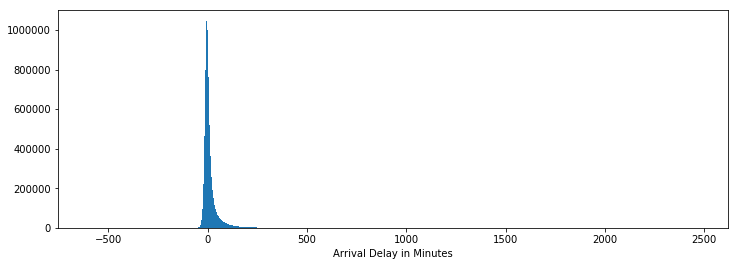

In [56]:
# standard-scaled histogram for ArrDelay
plt.figure (figsize = [12,4])
bins = np.arange(-600, df_copy.ArrDelay.max()+5, 5)
plt.hist(data = df_copy, x = 'ArrDelay', bins = bins)
plt.xlabel('Arrival Delay in Minutes');

Since we have few data points in both tails (outliers), it is hard to see their distribution. Therefore, I am going to zoom in the distribution for the data points between -50 and 100 to have a better view.

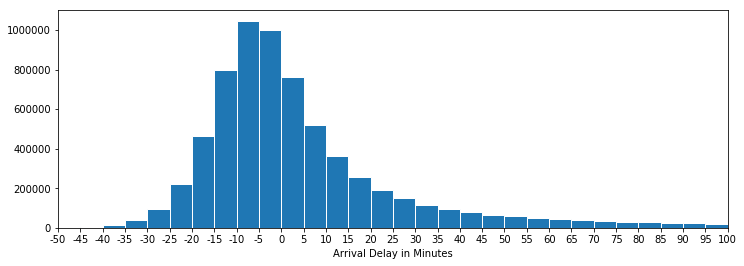

In [57]:
# zoomed in histogram for ArrDelay
plt.figure(figsize = [12,4])
plt.hist(df_copy.ArrDelay, bins = bins, edgecolor = 'white')
ticks = np.arange(-100, 2500+5, 5)
plt.xticks(ticks, ticks)
plt.xlabel('Arrival Delay in Minutes')
plt.xlim(-50, 100);

The resulting histogram has a bell curve shape with long right tail. It seems most of the flights arrive 10 to 5 minutes earlier.

**DepDelay**

In [58]:
# descriptive stats to choose bins edges of the histogram of DepDelay
df_copy.DepDelay.describe().astype(int)

count    6855029
mean           9
std           35
min         -534
25%           -4
50%           -1
75%            8
max         2467
Name: DepDelay, dtype: int32

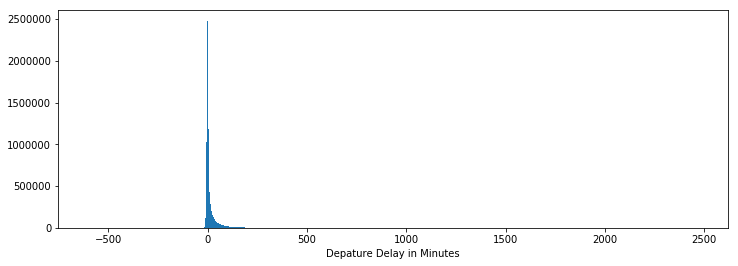

In [59]:
# Standard-scaled Histogram for DepDelay
plt.figure(figsize = [12,4])
bin = np.arange(-550, df_copy.DepDelay.max()+5, 5)
plt.hist(df_copy.DepDelay, bins = bins)
plt.xlabel('Depature Delay in Minutes');

Just like `ArrDelay`, we have many outliers on both tails but mostly on the right one. Let's zoom in the plot to better understand the distribution

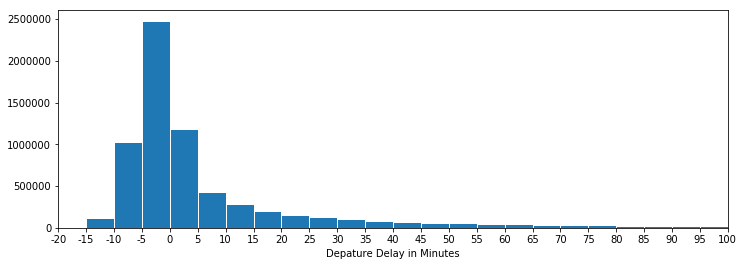

In [60]:
# zoomed-in histogram for DepDelay
plt.figure(figsize = [12,4])
bins = np.arange(-550, df_copy.DepDelay.max()+5, 5)
plt.hist(df_copy.DepDelay, bins = bins, edgecolor ='white')
plt.xlabel('Depature Delay in Minutes')
ticks = np.arange(-100, 2500+5, 5)
plt.xticks(ticks, ticks)
plt.xlim(-20, 100);

Here we see that the flights departs mostly 5 minutes earlier with long tail on the right side.

As we saw in the assessing phase `WeatherDelay` and `SecurityDelay` have more than 90% of 0 values, i.e., no delay associated with that specific variable. Therefore, I expect to see that to be reflected in their distribution. let's plot histograms for all of them.<br>

In [61]:
# create a function that returns a standard-scaled histogram with bin size=5 to apply it to CarrierDelay, WeatherDelay,
# SecurityDelay, NASDelay, and LateAircraftDelay. The function takes one input: variable name

def hist(col):
    '''Returns standard-scaled Histogram'''
    plt.figure(figsize = [14,4])
    bins = np.arange(0, df_copy_v2[col].max()+5, 5)
    plt.hist(df_copy_v2[col], bins = bins)
    plt.xlabel('{} in Minutes'.format(col))
    return
    

**CarrierDelay**

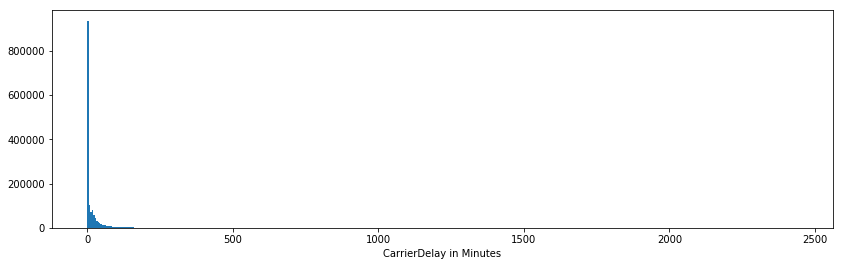

In [62]:
# standard-scaled histogram for CarrierDelay
hist('CarrierDelay')

**WeatherDelay**

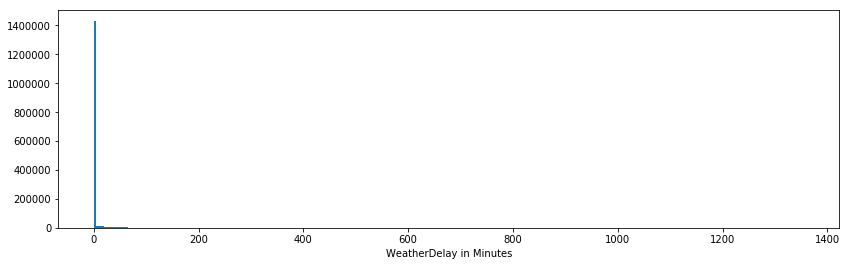

In [63]:
# standard-scaled histogram for WeatherDelay
hist('WeatherDelay')

**SecurityDelay**

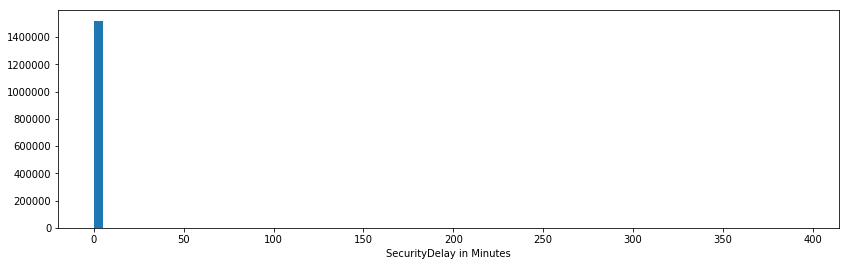

In [64]:
# standard-scaled histogram for SecurityDelay
hist('SecurityDelay')

**NASDelay**

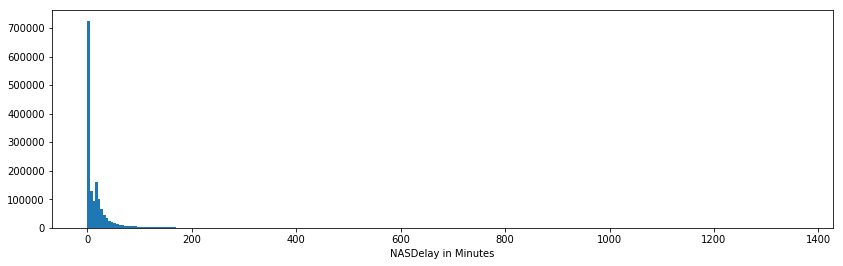

In [65]:
# standard-scaled histogram for NASDelay
hist('NASDelay')

**LateAircraftDelay**

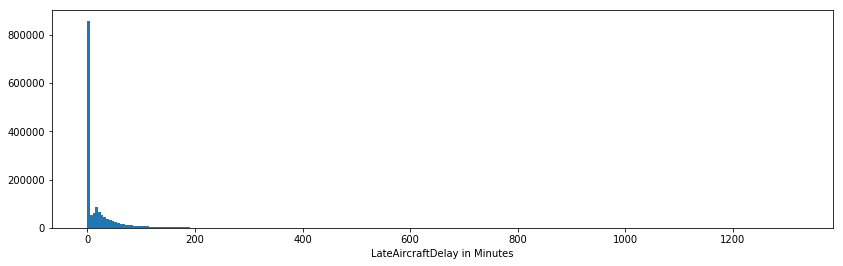

In [66]:
# standard-scaled histogram for LateAircraftDelay
hist('LateAircraftDelay')

For each plot, we notice that we have large amount of values around zero on the x-axis. As expected, in `WeatherDelay` and `SecurityDelay` mostly, all the values are around 0 minutes. In addition, all the distributions are highly skewed to the right. To have better understanding of each variable distribution, I am going to zoom in each histogram and plot the log transformation as well.

In [67]:
# This function creates two plots side by side, the left plot is a zoomed-in histogram and the right plot is the log-transformed
# histogram. The function takes five inputs:
# col: the variable name
# bins_n :the bin size for the zoomed-in histogram
# bin_l: the bin size for the log-transformed histogram
# x: the lower x limit for the zoomed-in histogram
# y: the upper x limit for the zoomed-in histogram

def hist_plot(col, bins_n, bins_l, x, y):
    '''Returns zoomed in normal-scaled histogram along with log-transformed histogram'''
    plt.figure(figsize = [14,4])
    plt.subplot(1,2,1)
    bins = np.arange(0, df_copy_v2[col].max()+bins_n, bins_n)
    plt.hist(df_copy_v2[col], bins = bins)
    plt.xlabel('{} in Minutes'.format(col))
    plt.title('Zoomed-in Standard-Scaled Histogram')
    plt.xlim(x, y)
    
    plt.subplot(1,2,2)
    bins = 10 ** np.arange(0, np.log10(df_copy_v2[col].max())+bins_l, bins_l)
    plt.hist(df_copy_v2[col], bins = bins)
    plt.xscale('log')
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    plt.xlabel('{} in Minutes'.format(col))
    plt.title('Log Transformed Histogram')
    plt.xticks(ticks, ticks);

**CarrierDelay**

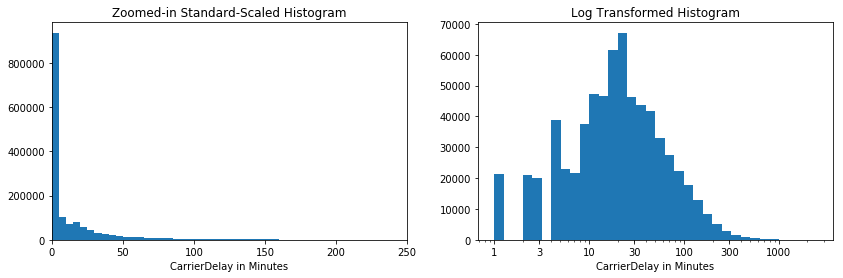

In [68]:
# create zoomed-in histogram and log-transformed histogram for CarrierDelay
hist_plot('CarrierDelay', 5, .1, 0, 250)

**WeatherDelay**

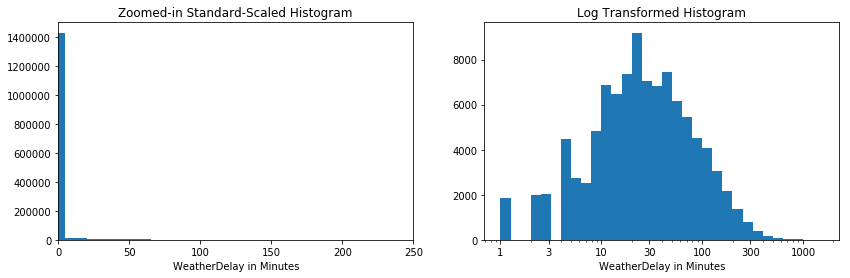

In [69]:
# create zoomed-in histogram and log-transformed histogram for WeatherDelay
hist_plot('WeatherDelay', 5, .1, 0, 250)

**SecurityDelay**

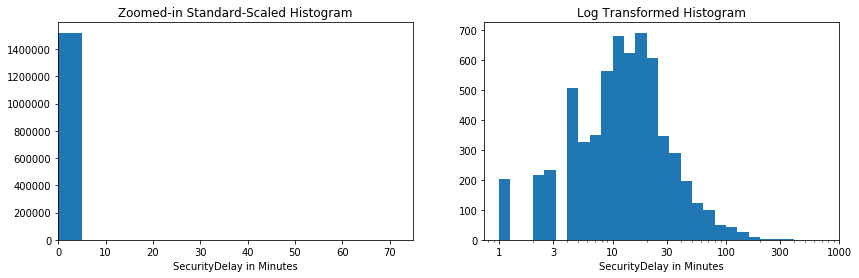

In [70]:
# create zoomed-in histogram and log-transformed histogram for SecurityDelay
hist_plot('SecurityDelay', 5, .1, 0, 75)

**NASDelay**

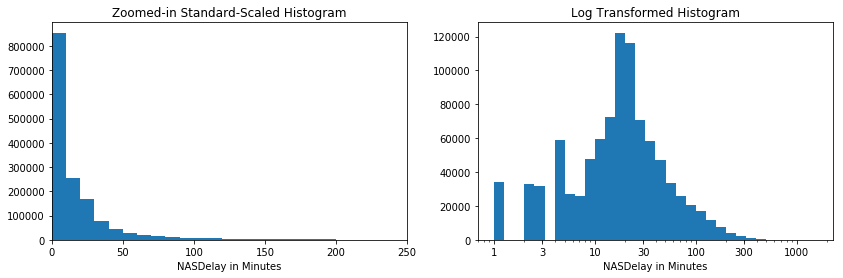

In [71]:
# create zoomed-in histogram and log-transformed histogram for NASDelay
hist_plot('NASDelay', 10, .1, 0, 250)

**LateAircraftDelay**

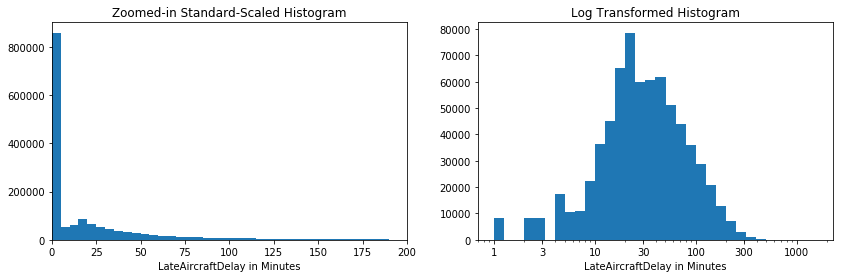

In [72]:
# create zoomed-in histogram and log-transformed histogram for LateAircraftDelay
hist_plot('LateAircraftDelay', 5, .1, 0, 200)

From the log-transformed distribution, we see most of the delay is greater than 10 minutes and less than 30 minutes. 

**Distance**

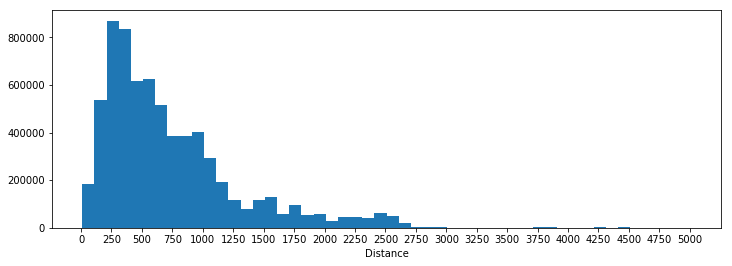

In [73]:
# standard-scaled histogram for Distance
plt.figure(figsize = [12,4])
bins = np.arange(10, 5000+100, 100)
plt.hist(df_copy.Distance, bins = bins)
ticks = np.arange(0, 5000+250, 250)
plt.xlabel('Distance')
plt.xticks(ticks, ticks);

Most of the distances are between 250 and less than 500 miles with some extreme values around 4500 miles.

**Month**

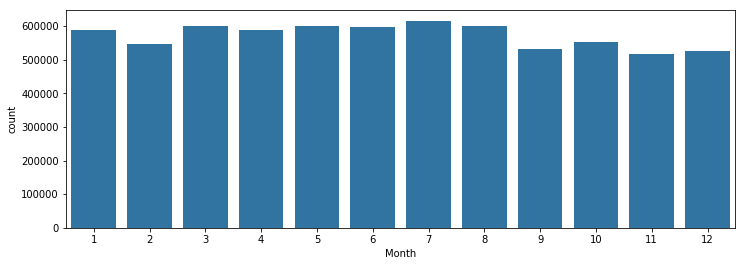

In [74]:
# bar chart for Month
plt.figure(figsize = [12,4])
base_color = sns.color_palette()[0]
sns.countplot(df_copy.Month, color = base_color);

It does not seem there is a clear trend in the number of flights over the year. However, July is slightly higher than other months, around 600k flights. 

**UniqueCarrier**

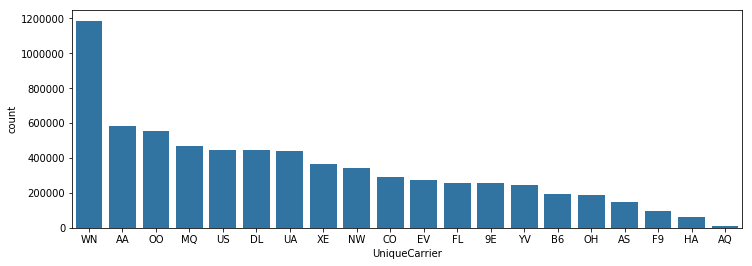

In [75]:
# to order bars from max to min
crr_order = df_copy.UniqueCarrier.value_counts().index

# bar plot
plt.figure(figsize = [12,4])
sns.countplot(df_copy.UniqueCarrier, color = base_color, order = crr_order);

From the plot above, we see that **WN**, which stands for Southwest Airlines, has the highest number of flights, around 1,190,000 flights, while **AQ**, which stands for Aloha Airlines Inc., has the lowest number of flights less than 8000.

**Dest**

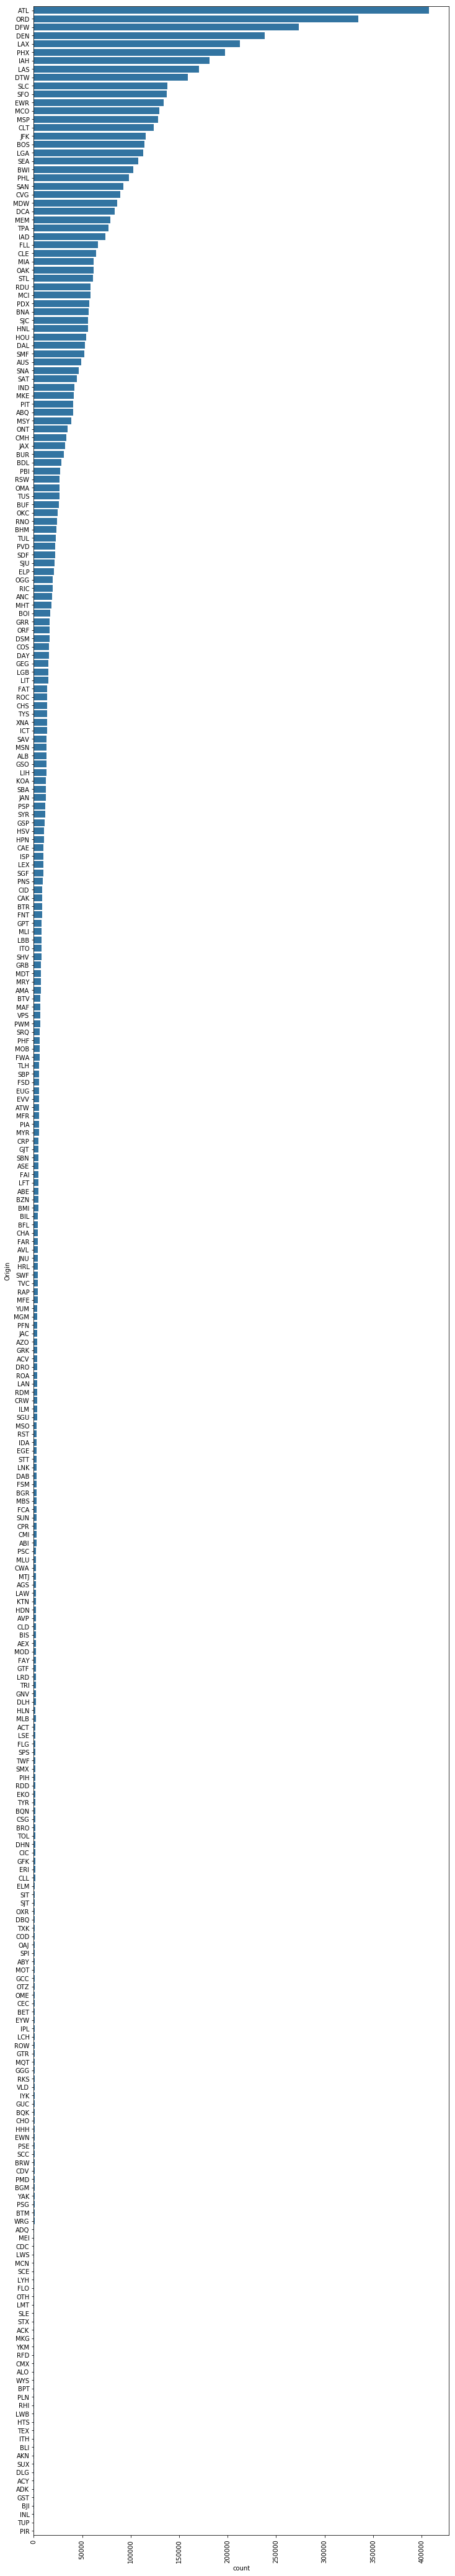

In [76]:
# to order bars from max to min
cat_order = df_copy.Dest.value_counts().index

# bar plot 
plt.figure(figsize = [12,75])
sns.countplot(data = df_copy, y = 'Origin', color = base_color, order = cat_order)
plt.xticks(rotation = 90);

It seems that **ATL**, Hartsfield-Jackson Atlanta International Airport is the busiest and **PIR**, Pierre Regional Airport is the lowest in terms of hosting flights.

**Diverted**

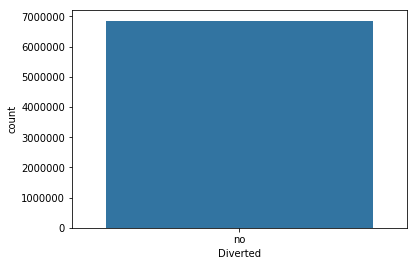

In [78]:
# bar chart for Diverted
sns.countplot(data = df_copy, x = 'Diverted');

After deleting missing values, it seems that diverted flights were deleted and only non-diverted flight remained. Therefore, using this variable for analysis is not beneficial.

## Bivariate Analysis

**DepDelay** vs **ArrDelay**

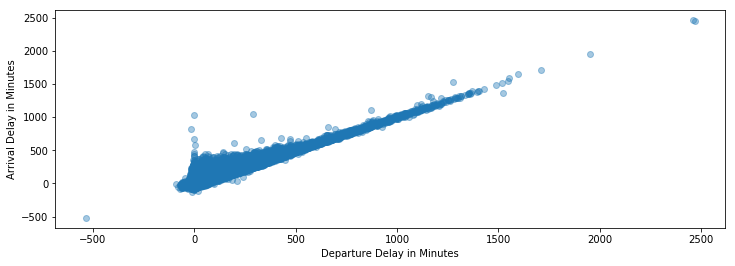

In [79]:
# scatter plot for DepDelay vs ArrDelay
plt.figure(figsize = [12,4])
plt.scatter(data = df_copy, x = 'DepDelay', y = 'ArrDelay', alpha = .4)
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes');

From the scatter plot above, we can realize that we have a strong positive linear relationship between departure delay and arrival delay as I expected. However, we can also notice that we have some data points where arrival delays are higher than the departure delay. The most extreme ones are around x = 0, i.e., when departure is on time but the arrival delay is up to ~1100 minutes. This variability could have been affected by other variables. Let's examine the points around `DepDelay` = 0.

In [80]:
# create DataFrame to capture the data points where DepDelay between 100 minutes early and 10 minutes late and ArrDelay is 
# more than 500 minutes late
df_copy.query(' 10 >= DepDelay > -100 and ArrDelay > 500').sort_values('ArrDelay', ascending = False)

,Month,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2763487,5,HA,1350.0,1034.0,0.0,SEA,HNL,2677,no,1034.0,0.0,0.0,0.0,0.0
2763603,5,HA,1154.0,823.0,-14.0,SEA,OGG,2640,no,823.0,0.0,0.0,0.0,0.0
2763567,5,HA,981.0,666.0,-2.0,HNL,SEA,2677,no,648.0,0.0,0.0,0.0,18.0
2160490,4,HA,886.0,573.0,3.0,HNL,SEA,2677,no,573.0,0.0,0.0,0.0,0.0


As we can see, although the departure was on time or even earlier, there was an arrival delay that is equal to the carrier delay `CarrDelay`. In the multivariate analysis, I will look further into this.<br>

**UniqueCarrier** vs **CarrierDelay**

Since `CarrierDelay` is a delay caused by the carrier, there is a direct relationship between both variables. Therefore, I am going to create a boxplot to depict that relationship. Overall, `CarrierDelay` is part of `ArrDelay`.

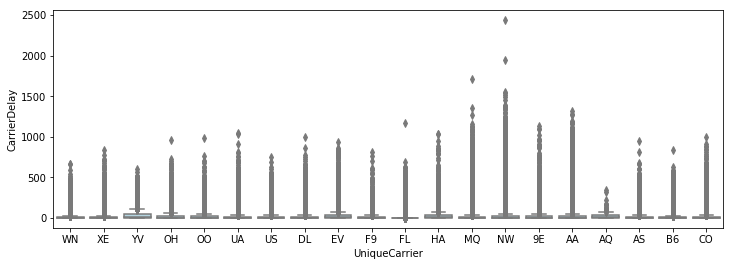

In [81]:
# boxplot for UniqueCarrier vs CarrierDelay
plt.figure(figsize = [12,4])
sns.boxplot(data = df_copy_v2, x = 'UniqueCarrier', y = 'CarrierDelay', color = 'lightblue');

As we remember from the descriptive stats of `CarrierDelay` that the minimum, the 25th percentile, and the median are zero and the 75th percentile is 16, that is why it is hard to see the edges of boxes. Now, one way to resolve this is to graph the boxplot for values larger than zero, i.e., plot the delays only.

In [82]:
# create a new DataFrame for values in CarrierDelay > 0
df_carr_delay = df_copy_v2.query('CarrierDelay > 0')
df_carr_delay.CarrierDelay.describe()

count    670622.000000
mean         35.859571
std          54.180292
min           1.000000
25%           9.000000
50%          19.000000
75%          41.000000
max        2436.000000
Name: CarrierDelay, dtype: float64

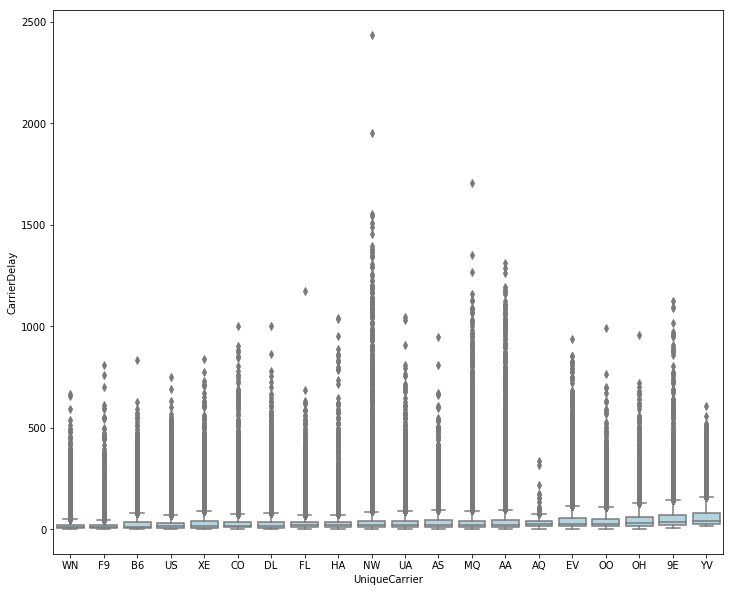

In [83]:
# create an ordered series to sort boxplot by median
order = df_carr_delay.groupby('UniqueCarrier').median()['CarrierDelay'].sort_values()

# create the boxplot
plt.figure(figsize = [12,10])
sns.boxplot(data = df_carr_delay, x = 'UniqueCarrier', y = 'CarrierDelay', color = 'lightblue', order = order.index);

It seems that **WN** has the lowest median carrier delay, while **YV** has the highest. We can also notice a large amount of variability in the data with extreme outliers in most of the carriers with the highest being in **NW** and the lowest in **AQ**.<br>

Now, let's find the average carrier delay for each carrier and plot a bar chart.

In [84]:
# create sorted pandas Series for average carrier delay by carrier
CarrierDelay_by_carr = df_copy.groupby('UniqueCarrier').mean()['CarrierDelay']
CarrierDelay_by_carr_sorted = CarrierDelay_by_carr.sort_values()

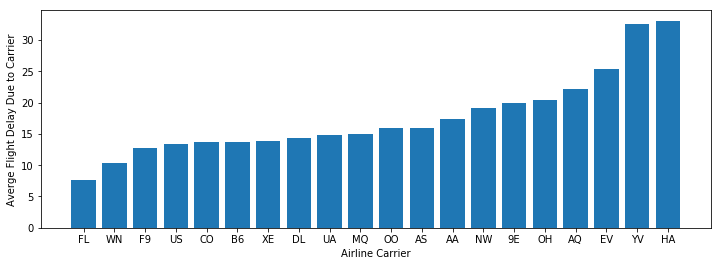

In [85]:
# plot the avarage carrier delay by carrier
plt.figure(figsize = [12,4])
plt.bar(CarrierDelay_by_carr_sorted.index, CarrierDelay_by_carr_sorted.values)
plt.xlabel('Airline Carrier')
plt.ylabel('Averge Flight Delay Due to Carrier');

**FL** seems to have the lowest average carrier delay, less than 10 minutes, while **HA** the highest, slightly more than 30 minutes.

**ArrDelay** by **Month**

In [92]:
# group months by monthly average arrival delay
ArrDelay_by_mo = df_copy.groupby('Month').mean()['ArrDelay']

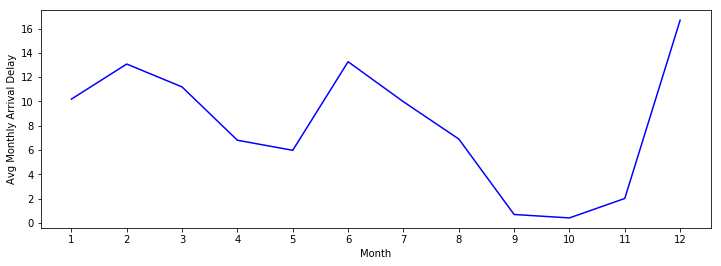

In [93]:
# line chart for Month vs avg monthly arrival delay
plt.figure(figsize = [12,4])
plt.errorbar(ArrDelay_by_mo.index, ArrDelay_by_mo.values)
ticks  = np.arange(1,13,1)
plt.xticks(ticks, ticks)
plt.xlabel('Month')
plt.ylabel('Avg Monthly Arrival Delay');

As we can see from the line chart above, the average monthly delay fluctuates from low to high and seems it repeats itself. However, it will be better if we have data of other years to see if this is a standard pattern and is not specific to this year only. With that being said, we see February and June have about the same average delay around 14 minutes, September , October and  November seems to be the best since the average delay is no more than two minutes while December is highest with average delay of around 17 minutes.<br>

Now, I am interested to see the percentage of flights status, i.e., **Early**, **On time**, and **Delayed**. To do that, I am going to feature engineer another variable, `FlightStatus` and add it to `df_copy`. If `ArrDelay` less than 0, then this is an early flight, if `ArrDelay` equal to 0, then this is on time flight, if `ArrDelay` greater than 0, then this is a delayed flight. I will create a function `flight_status` and apply to `ArrDelay` column as follows:


In [94]:
def flight_status(x):
    ''' create a function that returns whether a flight is Early, On time, or Delayed'''
    if x < 0:
        return 'Early'
    elif x ==  0:
        return 'On time'
    else:
        return 'Delayed'

In [95]:
# create a new column after applying the function
df_copy['FlightStatus'] = df_copy.ArrDelay.apply(flight_status)
df_copy.head(10)

,Month,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightStatus
0,1,WN,116.0,-14.0,8.0,IAD,TPA,810,no,NaN,NaN,NaN,NaN,NaN,Early
1,1,WN,113.0,2.0,19.0,IAD,TPA,810,no,NaN,NaN,NaN,NaN,NaN,Delayed
2,1,WN,76.0,14.0,8.0,IND,BWI,515,no,NaN,NaN,NaN,NaN,NaN,Delayed
3,1,WN,78.0,-6.0,-4.0,IND,BWI,515,no,NaN,NaN,NaN,NaN,NaN,Early
4,1,WN,77.0,34.0,34.0,IND,BWI,515,no,2.0,0.0,0.0,0.0,32.0,Delayed
5,1,WN,87.0,11.0,25.0,IND,JAX,688,no,NaN,NaN,NaN,NaN,NaN,Delayed
6,1,WN,230.0,57.0,67.0,IND,LAS,1591,no,10.0,0.0,0.0,0.0,47.0,Delayed
7,1,WN,219.0,-18.0,-1.0,IND,LAS,1591,no,NaN,NaN,NaN,NaN,NaN,Early
8,1,WN,70.0,2.0,2.0,IND,MCI,451,no,NaN,NaN,NaN,NaN,NaN,Delayed
9,1,WN,70.0,-16.0,0.0,IND,MCI,451,no,NaN,NaN,NaN,NaN,NaN,Early


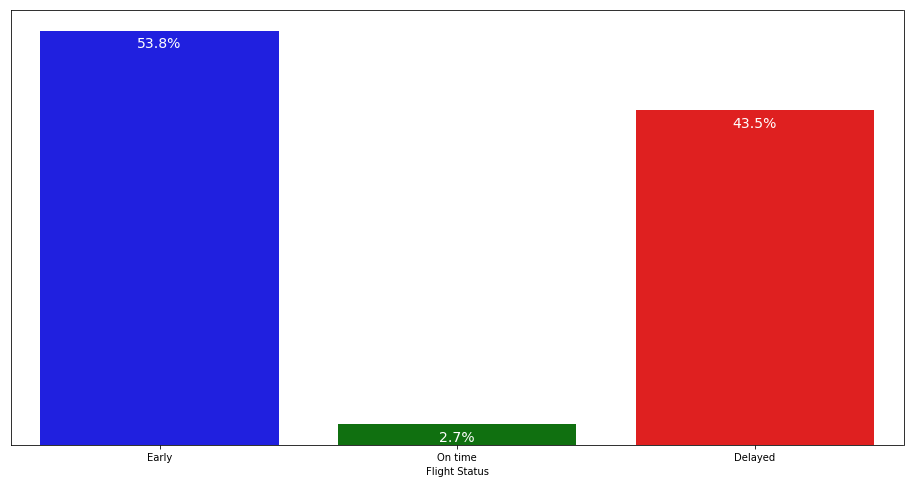

In [96]:
# set bars color
color = ['blue', 'green', 'red']
sns.set_palette(color)

# create customized order
order = ['Early', 'On time', 'Delayed']
cat_order = pd.api.types.CategoricalDtype(categories = order, ordered = True)
df_copy['FlightStatus'] = df_copy['FlightStatus'].astype(cat_order)

# bar chart for flight perecentage by status
plt.figure(figsize = [16,8])
sns.countplot(data = df_copy, x = 'FlightStatus')

# add annotations
n_points = df_copy.shape[0]
cat_counts = df_copy.FlightStatus.value_counts()
locs, labels = plt.xticks()

# loop through each pair for locations and labels
for loc, label in zip(locs, labels):
    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count-150000, pct_string, ha = 'center', size = 14, color = 'w')
plt.yticks([])   
plt.ylabel('')
plt.xlabel('Flight Status');

Now, let's create bar chart for `FlightStatus` by `UniqueCarrier`

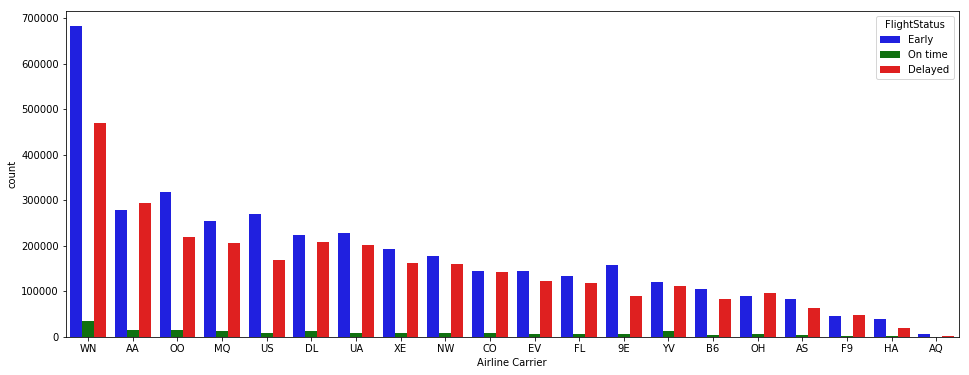

In [97]:
# create a clustered bar chart for UniqueCarrier vs FlightStatus
plt.figure(figsize = [16,6])
sns.countplot(data = df_copy, x = 'UniqueCarrier', hue = 'FlightStatus', order = crr_order)
plt.xlabel('Airline Carrier');

From the clustered bar chart above, it seems the number of **Early** flights is more than the **Delayed** flights for most of the carriers except **AA**, **OH**, and **F9**. We can also notice that **On time** flights are way less than the other two flight status, which might be ok since we defined **On time** to have 0 minutes delay. However, this may not be realistic. We might choose to define **On time** where the flight is between 5 minutes early and 5 minutes late, or so.

**ArrDelay** vs **Distance**

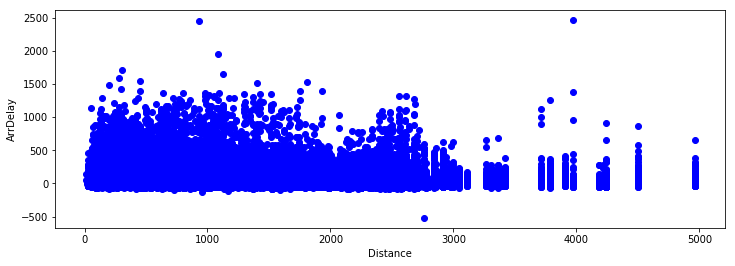

In [98]:
# create a scatterplot for Distance vs ArrDelay
plt.figure(figsize = [12,4])
plt.scatter(data = df_copy, x = 'Distance', y = 'ArrDelay')
plt.xlabel('Distance')
plt.ylabel('ArrDelay');

As expected, the distance does not seem to have an effect on the arrival delay.

## Multivariate Analysis

**DepDelay** vs **ArrDelay** by **CarrierDelay**, **WeatherDelay**, **SecurityDelay**, **NASDelay**, **LateAircraftDelay**

Now, I would like to see how `CarrierDelay`, `WeatherDelay`, `SecurityDelay`, `NASDelay`, and `LateAircraftDelay` relate to both `ArrDelay` and `DepDelay`, so I will create multivariate plot for `DepDelay` vs `ArrDelay` vs all of the above variables, one at a time.

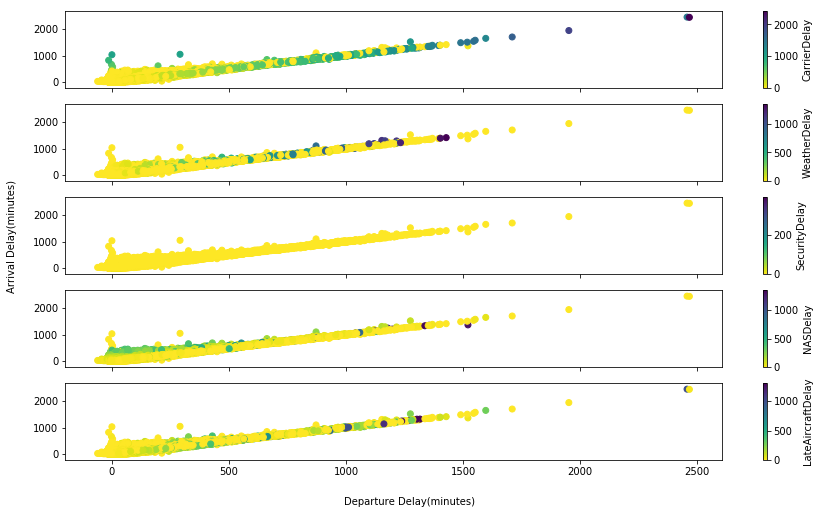

620.4444873332977

In [99]:
start = time.time()

# The following code will create five multivariate scatterplots. For each plot, the x-axis will be DepDelay and the y-axis will
# be the ArrDelay. To add the thrid numerical variable, the code will loop over list of the vairable names and add one for each 
# plot sequentially

fig, ax = plt.subplots(nrows = 5, sharex = True, sharey=True, figsize = [14.70, 8.27])

variables = ['CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']
for i in range(len(variables)):
    var = variables[i]
    splot = ax[i].scatter(data = df_copy_v2, x = 'DepDelay', y = 'ArrDelay' , c = var, cmap = 'viridis_r')
    plt.colorbar(splot, ax = ax[i], label = var)

fig.text(.45, .05, 'Departure Delay(minutes)', ha = 'center')
fig.text(.07, .5, 'Arrival Delay(minutes)', va = 'center', rotation = 'vertical')
plt.show()
time.time() - start

As we found out in the bivariate analysis, the departure delay between 500 and 1100 minutes seems to be affected  by carrier delay as it is represented in the first plot by the green dots. And if we look at the color bar we realize that this shade of green refers to values between 500 and 1000, which explains the arrival delay.  We can also realize that the carrier delay is increasing along the scatter plot until it reaches its peak for values more than 2000.<br>

In third plot, it seems that `SecurityDelay` does not have a noticeable effect on the both departure and arrival delay.<br>
 
In the fourth plot, we can see that `NASDelay` has more effect on arrival delay where departure delay is around 0 and 500 minutes. This could explain why arrival delay is slightly higher than the departure delay in this area (the area colored with light green).<br>

To summarize, most of the time, the third variable has an effect on both the departure and arrival delay, but sometime, it has an effect on the arrival delay only. 